In [ ]:
!pip install spectral

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15,10)

In [ ]:
# Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import tifffile as tif
#from spectral import imshow
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Leitura dos arquivos
im = tif.imread('/content/cubo_L7.tif')
#ro = tif.imread('/content/ROI_cubo_L7.tif')
ro2 = tif.imread('/content/ROI_2.tif')

In [ ]:

# Visualização das ROI
view = imshow(im, (2,1,0), classes = ro, stretch=(0.02) )
view.set_display_mode('overlay')

In [ ]:
# Visualização das ROI2
view = imshow(im, (2,1,0), classes = ro2, stretch=(0.02) )
view.set_display_mode('overlay')

In [ ]:
# Definindo função para o KNN
def KNN(img, roi, k):
  X = img[roi > 0]
  y = roi[roi > 0] 

  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X, y)
  pred = knn.predict(X)
  img2d= img.reshape(img.shape[0] * img.shape[1], img.shape[2])
  pred2d = knn.predict(img2d)
  pred_final = pred2d.reshape(img[:, :, 0].shape)
  return pred_final

In [ ]:
# KNN para o primeiro conjunto de ROIs
knn_roi1 = KNN(im,ro,10)

In [ ]:
# Visualizando resultado
plt.imshow(knn_roi1)

In [ ]:
# KNN para o segundo conjunto de ROIs
knn_roi2 = KNN(im,ro2,10)

In [ ]:
# Visualizando resultado
plt.imshow(knn_roi2)

In [ ]:
# Calculando diferença entre as duas classificações
diff = knn_roi1 - knn_roi2

plt.imshow(diff, cmap='Greys')

In [ ]:
dois_desvio_neg = np.mean(diff) - 2 * np.std(diff)
dois_desvio_pos = np.mean(diff) + 2 * np.std(diff)

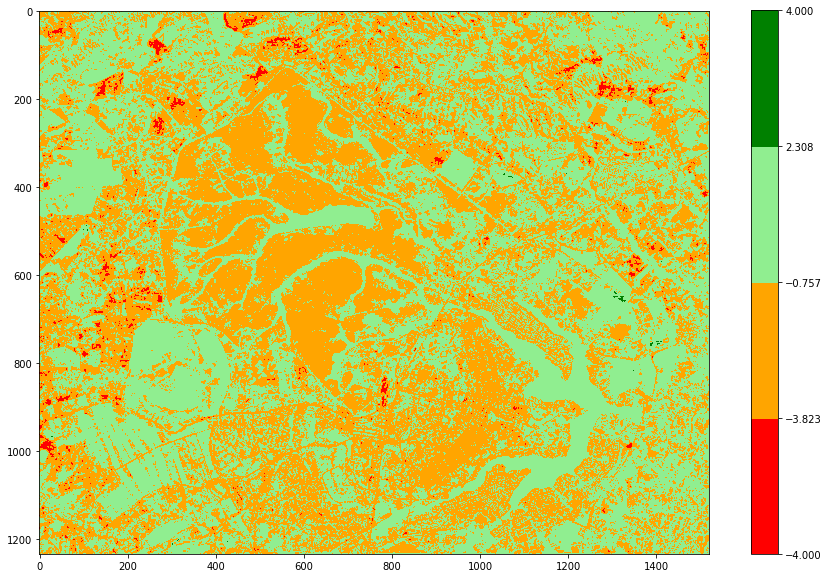

In [ ]:
cmap = colors.ListedColormap(['red', 'orange','lightgreen','green'])
bounds=[np.min(diff),dois_desvio_neg,np.mean(diff),dois_desvio_pos,np.max(diff)]
norm = colors.BoundaryNorm(bounds, cmap.N)

img = plt.imshow(diff,cmap=cmap, norm=norm)

plt.colorbar(img, cmap=cmap, norm=norm, boundaries=bounds, ticks=bounds)

In [ ]:
from sklearn.metrics import accuracy_score

X = im[ro2 > 0]
y = ro2[ro2 > 0]
ks = [10,20,30,50,100,200,300,400,500,600,700]
acc =[]

for i in ks:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X, y)
  pred = knn.predict(X)
  acc.append(accuracy_score(y,pred))
  print('Acurácia para k = {} é: {}'.format(i, accuracy_score(y,pred)))


Acurácia para k = 10 é: 1.0
Acurácia para k = 20 é: 1.0
Acurácia para k = 30 é: 1.0
Acurácia para k = 50 é: 1.0
Acurácia para k = 100 é: 0.987012987012987
Acurácia para k = 200 é: 0.8441558441558441
Acurácia para k = 300 é: 0.712987012987013
Acurácia para k = 400 é: 0.44415584415584414
Acurácia para k = 500 é: 0.4051948051948052
Acurácia para k = 600 é: 0.4051948051948052
Acurácia para k = 700 é: 0.2077922077922078


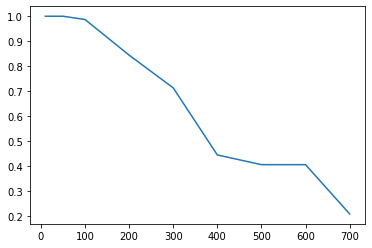

In [ ]:
plt.plot(ks, acc)

0.4051948051948052